In [3]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw5.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science: 
## Homework 5: Multiclass Classification & Decision Trees

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [4]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

# 🎓 Predicting Student Outcomes 🕳️

In this assignment, you will construct and evaluate classification models to predict student outcomes (“Dropout,” “Enrolled,” or “Graduate”) using demographic, socio-economic, and academic data available at the point of enrollment. The aim is to identify students at risk and understand the factors contributing to their academic outcomes.

The dataset used in this assignment originates from the Polytechnic Institute of Portalegre, Portugal, and includes information such as demographics, socio-economic background, and academic history at the time of enrollment. The classification task involves predicting whether a student will graduate, remain enrolled, or drop out, which poses unique challenges, including class imbalance.

More information on the dataset and related modeling approaches can be found in the paper "Early Prediction of Student’s Performance in Higher Education: A Case Study" by Martins et al.. We have included a PDF of this paper in the data directory for your reference.

<div style = "background: orange; border: thin solid black; border-radius: 2px; padding: 5px">
<details>
<summary><strong>Dataset Information</strong> (click to expand)</summary>

| Variable Name                       | Description                                                                                                                                                                                                                             |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital Status                      | **1** – single, **2** – married, **3** – widower, **4** – divorced, **5** – facto union, **6** – legally separated                                                                                                                                              |
| Application mode                    | **1** - 1st phase - general contingent, **2** - Ordinance No. 612/93, **5** - 1st phase - special contingent (Azores Island), **7** - Holders of other higher courses, **10** - Ordinance No. 854-B/99, **15** - International student (bachelor), **16** - 1st phase - special contingent (Madeira Island), **17** - 2nd phase - general contingent, **18** - 3rd phase - general contingent, **26** - Ordinance No. 533-A/99, item b2) (Different Plan), **27** - Ordinance No. 533-A/99, item b3 (Other Institution), **39** - Over 23 years old, **42** - Transfer, **43** - Change of course, **44** - Technological specialization diploma holders, **51** - Change of institution/course, **53** - Short cycle diploma holders, **57** - Change of institution/course (International) |
| Application order                   | Application order (between **0** - first choice and **9** - last choice)                                                                                                                                                                        |
| Course                              | **33** - Biofuel Production Technologies, **171** - Animation and Multimedia Design, **8014** - Social Service (evening attendance), **9003** - Agronomy, **9070** - Communication Design, **9085** - Veterinary Nursing, **9119** - Informatics Engineering, **9130** - Equinculture, **9147** - Management, **9238** - Social Service, **9254** - Tourism, **9500** - Nursing, **9556** - Oral Hygiene, **9670** - Advertising and Marketing Management, **9773** - Journalism and Communication, **9853** - Basic Education, **9991** - Management (evening attendance) |
| Daytime/evening attendance          | **1** – daytime, **0** - evening                                                                                                                                                                                                                |
| Previous qualification              | **1** - Secondary education, **2** - Higher education - bachelor's degree, **3** - Higher education - degree, **4** - Higher education - master's, **5** - Higher education - doctorate, **6** - Frequency of higher education, **9** - 12th year of schooling - not completed, **10** - 11th year of schooling - not completed, **12** - Other - 11th year of schooling, **14** - 10th year of schooling, **15** - 10th year of schooling - not completed, **19** - Basic education 3rd cycle (9th/10th/11th year) or equiv., **38** - Basic education 2nd cycle (6th/7th/8th year) or equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **42** - Professional higher technical course, **43** - Higher education - master (2nd cycle) |
| Previous qualification (grade)      | Grade of previous qualification (between **0** and **200**)                                                                                                                                                                                      |
| Nationality                         | **1** - Portuguese, **2** - German, **6** - Spanish, **11** - Italian, **13** - Dutch, **14** - English, **17** - Lithuanian, **21** - Angolan, **22** - Cape Verdean, **24** - Guinean, **25** - Mozambican, **26** - Santomean, **32** - Turkish, **41** - Brazilian, **62** - Romanian, **100** - Moldova (Republic of), **101** - Mexican, **103** - Ukrainian, **105** - Russian, **108** - Cuban, **109** - Colombian |
| Mother's qualification              | **1** - Secondary Education - 12th Year of Schooling or Eq., **2** - Higher Education - Bachelor's Degree, **3** - Higher Education - Degree, **4** - Higher Education - Master's, **5** - Higher Education - Doctorate, **6** - Frequency of Higher Education, **9** - 12th Year of Schooling - Not Completed, **10** - 11th Year of Schooling - Not Completed, **11** - 7th Year (Old), **12** - Other - 11th Year of Schooling, **14** - 10th Year of Schooling, **18** - General commerce course, **19** - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., **22** - Technical-professional course, **26** - 7th year of schooling, **27** - 2nd cycle of the general high school course, **29** - 9th Year of Schooling - Not Completed, **30** - 8th year of schooling, **34** - Unknown, **35** - Can't read or write, **36** - Can read without having a 4th year of schooling, **37** - Basic education 1st cycle (4th/5th year) or equiv., **38** - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **41** - Specialized higher studies course, **42** - Professional higher technical course, **43** - Higher Education - Master (2nd cycle), **44** - Higher Education - Doctorate (3rd cycle) |
| Father's qualification              | Similar values as Mother's qualification (refer to full details above)                                                                                                                                                                   |
| Mother's occupation                 | **0** - Student, **1** - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers, **2** - Specialists in Intellectual and Scientific Activities, **3** - Intermediate Level Technicians and Professions, **4** - Administrative staff, **5** - Personal Services, Security and Safety Workers and Sellers, **6** - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry, **7** - Skilled Workers in Industry, Construction and Craftsmen, **8** - Installation and Machine Operators and Assembly Workers, **9** - Unskilled Workers, **10** - Armed Forces Professions, **90** - Other Situation, **99** - (blank), **122** - Health professionals, **123** - teachers, **125** - Specialists in information and communication technologies (ICT), **131** - Intermediate level science and engineering technicians and professions, **132** - Technicians and professionals, of intermediate level of health, **134** - Intermediate level technicians from legal, social, sports, cultural and similar services, **141** - Office workers, secretaries in general and data processing operators, **143** - Data, accounting, statistical, financial services and registry-related operators, **144** - Other administrative support staff, **151** - personal service workers, **152** - sellers, **153** - Personal care workers and the like, **171** - Skilled construction workers and the like, except electricians, **173** - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like, **175** - Workers in food processing, woodworking, clothing and other industries and crafts, **191** - cleaning workers, **192** - Unskilled workers in agriculture, animal production, fisheries and forestry, **193** - Unskilled workers in extractive industry, construction, manufacturing and transport, **194** - Meal preparation assistants |
| Father's occupation                 | Similar values as Mother's occupation (refer to full details above)                                                                                                                                                                     |
| Admission grade                     | Admission grade (between **0** and **200**)                                                                                                                                                                                                     |
| Displaced                           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Educational special needs           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Debtor                              | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Tuition fees up to date             | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Gender                              | **1** – male, **0** – female                                                                                                                                                                                                                     |
| Scholarship holder                  | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Age at enrollment                   | Age of student at enrollment                                                                                                                                                                                                            |
| International                       | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Curricular units 1st sem (credited) | Number of curricular units credited in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (enrolled) | Number of curricular units enrolled in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (evaluations) | Number of evaluations to curricular units in the 1st semester                                                                                                                                                                            |
| Curricular units 1st sem (approved) | Number of curricular units approved in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (grade)    | Grade average in the 1st semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 1st sem (without evaluations) | Number of curricular units without evaluations in the 1st semester                                                                                                                                                                       |
| Curricular units 2nd sem (credited) | Number of curricular units credited in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (enrolled) | Number of curricular units enrolled in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (evaluations) | Number of evaluations to curricular units in the 2nd semester                                                                                                                                                                            |
| Curricular units 2nd sem (approved) | Number of curricular units approved in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (grade)    | Grade average in the 2nd semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 2nd sem (without evaluations) | Number of curricular units without evaluations in the 2nd semester                                                                                                                                                                       |
| Unemployment rate                   | Unemployment rate (%)                                                                                                                                                                                                                    |
| Inflation rate                      | Inflation rate (%)                                                                                                                                                                                                                       |
| GDP                                 | GDP                                                                                                                                                                                                                                      |
| Target                              | The problem is formulated as a three-category classification task: **dropout**, **enrolled**, or **graduate** at the end of the normal duration of the course                                                                                                                              |

</details>
</div>

<p>
<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Guidelines</strong>
</span>
</p>

This assignment is intentionally **open-ended**. You will not receive explicit instructions for every step—it is up to you to **make informed decisions** and **justify** them.

Consider every choice carefully, and support your decisions with **evidence** such as plots, metrics, or references to the literature.

The goal is to apply your data science expertise to a real-world problem where there may not be a single correct answer but rather multiple valid approaches that can be logically defended.

Feel free to add code and markdown cells as you need them. 

<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>HW5 Overview</strong>
</span>

- EDA & General Preprocessing
- Model 1: OvR Logistic Regression
- Model 2: Decicion Tree Classifier
- Model 3: Custom Classifier
- Model Comparison & Kaggle Submissions
- Causal Inference (BONUS)
- Wrap-up

🏆 **Each of the 3 models has an associated Kaggle competition. Making it into the top 20 on any of the leaderboards will earn you bonus points.**

<span style = "background: violet; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Submission Requirements</strong>
</span>

- The notebook submitted to Canvas must **run from top to bottom** without errors and contain **all output**.
- Notebooks are intended for human readers. Prose should appear in markdown cells, not code comments.
- Notebooks should contain no excessive output and no non-functional code unless the latter is included with the expressive purpose of communicating something to the reader. 
- Predictions must be saved in the specified paths when the notebook is run to facilitate staff verification.
- Kaggle submissions whose performance cannot be reproduced by the appropriate model in the related notebook submission will be disqualified.

<p>
<span style = "background: red; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>☣️ HW Submissions Copy-Pasted from Generative AI Output Will Receive No Credit ☣️</strong>
</span>
</p>



In [5]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, \
                        GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                            roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from collections import Counter
# For optional causal inference section
# from psmpy import PsmPy
# from psmpy.functions import cohenD
# from psmpy.plotting import *

In [6]:
# For calculating total notebook runtime
notebook_start = time.time()

## EDA & General Preprocessing

Load and explore the dataset. Your EDA should help inform your later modeling decisions. 

**Hints:**

- Consider methods to handle class imbalance, feature scaling, categorical variable encoding, and any necessary feature engineering. Provide justification for the choice you make, including reasons for *not* taking certain actions that might be considered standard in the given context.
- You may decide that your different models require their own distinct preprocessing steps rather than taking a one-size-fits-all approach.
- Take a moment to look at the imports provided above. You may find these useful through the notebook.

---

In [7]:
# get current directory and read in all given train and test datasets
current_dir = os.getcwd()
path = os.path.join(current_dir, 'data')
X_train = pd.read_csv(os.path.join(path, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(path, 'X_test.csv'))
y_train = pd.read_csv(os.path.join(path, 'y_train.csv'))
X_train.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1,1,17,2,9147,1,1,122.0,1,19,19,...,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
2,1,17,3,9670,1,1,123.0,1,38,38,...,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
3,1,39,1,9500,1,19,133.1,1,38,38,...,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
4,2,7,1,9254,1,2,100.0,1,37,37,...,0,0,5,10,0,0.000000,0,10.8,1.4,1.74


In [8]:
X_train.groupby(y_train.values.ravel())[X_train.columns[0]].mean()['Dropout']

np.float64(1.2457786116322702)

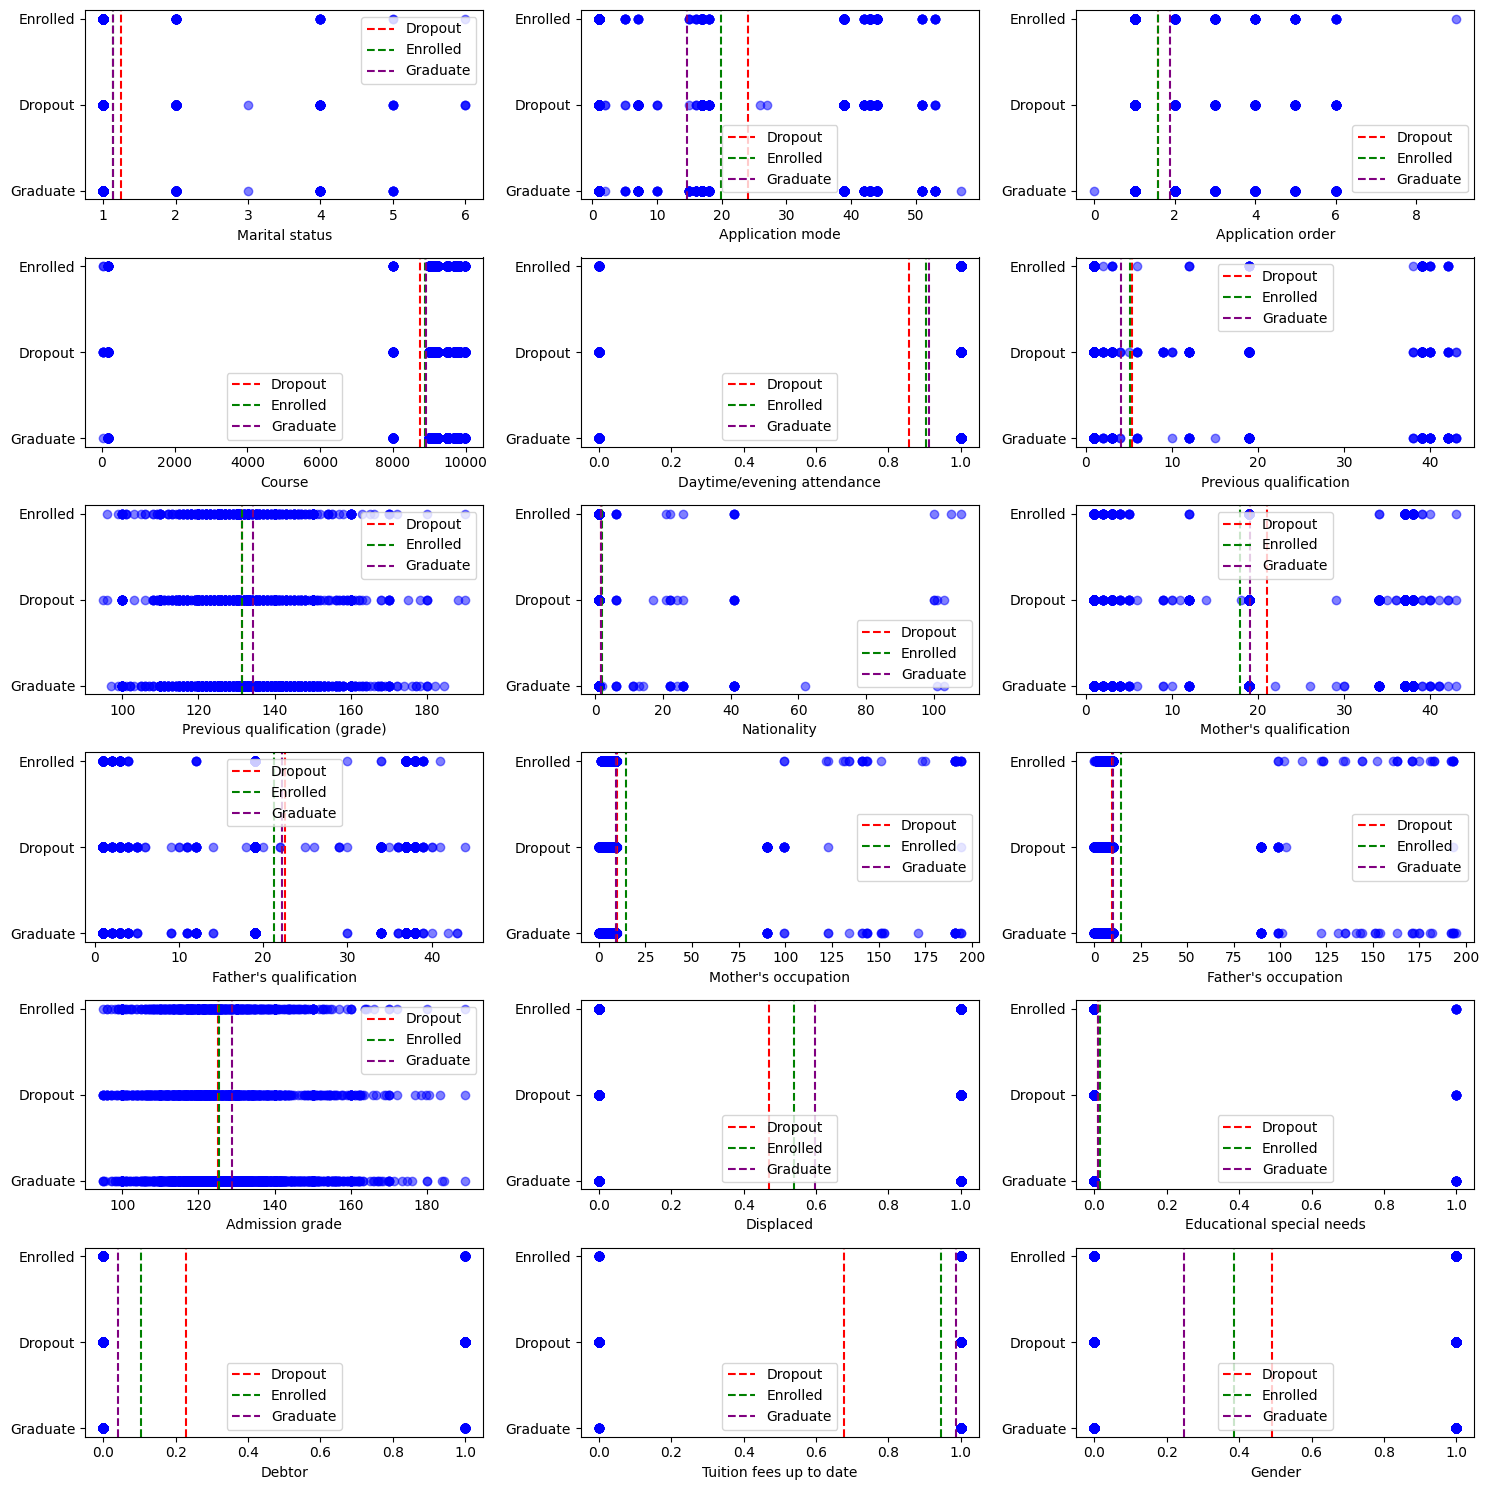

In [9]:
# plot all X_train predictors against y_train
fig, axs = plt.subplots(6,3, figsize=(15, 15))
axs = axs.ravel()
y_train_values = y_train.values.ravel()  

# loop through each column and plot scatters, X var group means
for i, col in enumerate(X_train.columns[:18]):
    axs[i].scatter(X_train[col], y_train_values, color='blue', alpha=0.5)
    axs[i].set_xlabel(col)

    # add mean for X, enrolled, dropout, graduate
    group_means = X_train.groupby(y_train_values)[col].mean()
    axs[i].axvline(group_means['Dropout'], color='red', linestyle='--', label = 'Dropout')
    axs[i].axvline(group_means['Enrolled'], color='green', linestyle='--', label = 'Enrolled')
    axs[i].axvline(group_means['Graduate'], color='purple', linestyle='--', label = 'Graduate')
    axs[i].legend()

plt.tight_layout()

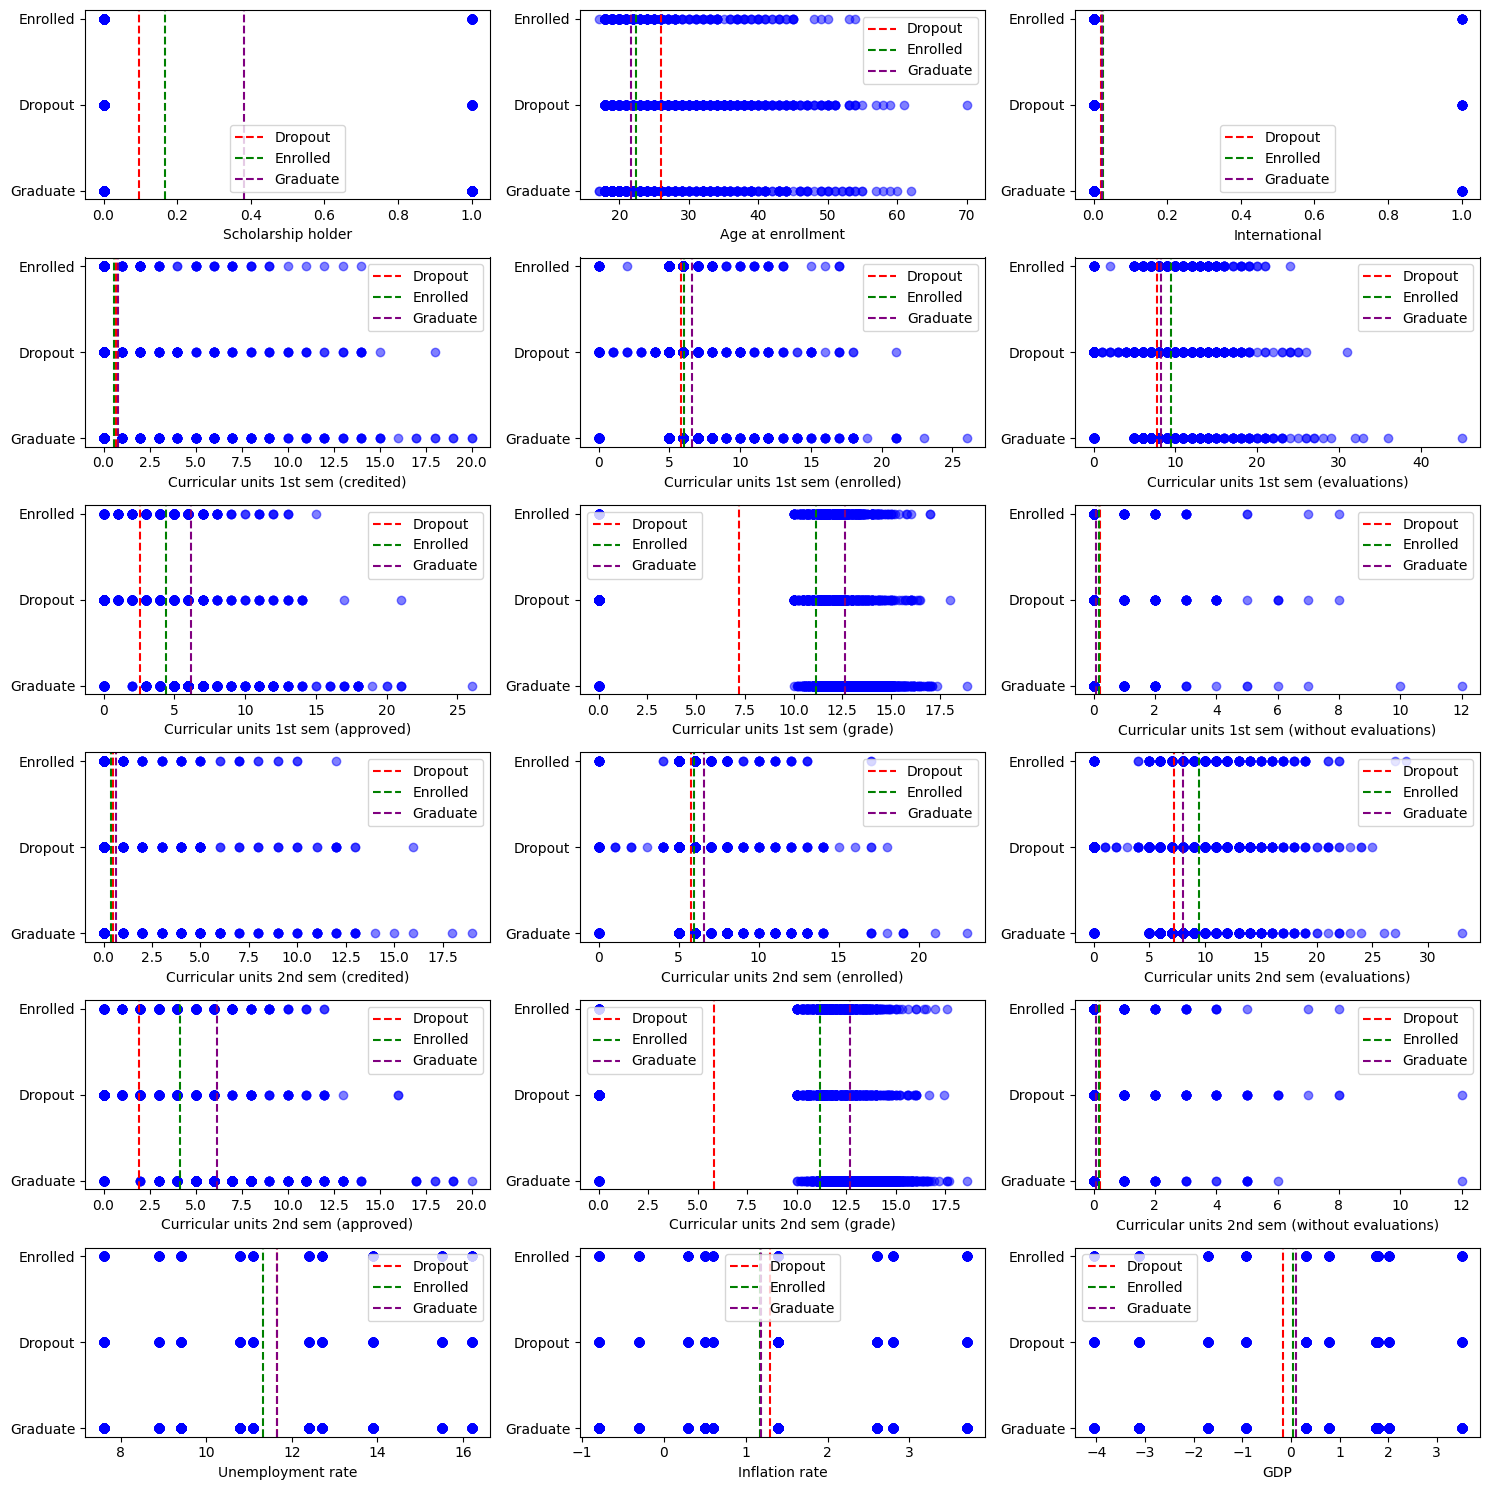

In [10]:
# same procedure for back 18 columns

fig, axs = plt.subplots(6,3, figsize=(15, 15))
axs = axs.ravel()
y_train_values = y_train.values.ravel()  
for i, col in enumerate(X_train.columns[18:]):
    axs[i].scatter(X_train[col], y_train_values, color='blue', alpha=0.5)
    axs[i].set_xlabel(col)
    # add mean for X, enrolled, dropout, graduate
    group_means = X_train.groupby(y_train_values)[col].mean()
    axs[i].axvline(group_means['Dropout'], color='red', linestyle='--', label = 'Dropout')
    axs[i].axvline(group_means['Enrolled'], color='green', linestyle='--', label = 'Enrolled')
    axs[i].axvline(group_means['Graduate'], color='purple', linestyle='--', label = 'Graduate')
    axs[i].legend()

plt.tight_layout()

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

Application mode, gender, debtor, tuition fees up to date, displaced, look like potential predictors of the three outcomes. Curricular Units (grade) seems to visually and intuitively provide the best prediction for the many predictors including curricular units. Including all of these parameters in the model could create redundancy and collinearity problems. Age also looks like it may make a slight difference, especially with dropout rate. Additionally, the latter 18 predictors show that the binary scholarship holder predictor has an impact, which makes sense intuitively.

For feature scaling, I used the same process outlined in HW4 where we scaled the nonbinary predictors. Let it be noted that scaling is not necessary for decision trees, so ```X_train_predictors``` and ```X_test_predictors``` can be used for decision tree models. Otherwise, parametric models like logistic regression will weigh predictors more equally if units of continuous variables are coerced to the same scale.

For class imbalances, I decided *not* to address this in the preprocessing steps because I thought it may be helpful to do this differently depending on the model of interest. **NOTE**: This step was done in logistic regression for comparison of classification score metrics on the original dataset versus the same model applied to SMOTE dataset as discussed in lab.

Finally, I encoded the y_train into 3 categories using the built-in sklearn encoder and displayed the mapping in a dictionary.

Lastly, I did not use one-hot-encoding for any predictor variables since each predictor that I deemed important is either categorical with two levels or numerical continuous/discrete.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [11]:
X_train.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [12]:
#feature scaling with deemed important predictors from above
predictors = ['Application mode', 
              'Gender',
              'Tuition fees up to date',
              'Displaced',
              'Scholarship holder',
              'Age at enrollment',
              'Curricular units 1st sem (grade)',
              'Curricular units 2nd sem (grade)']

X_train_predictors = X_train[predictors]
X_test_predictors = X_test[predictors]

non_binary_predictors = ['Curricular units 1st sem (grade)', 
                         'Curricular units 2nd sem (grade)',
                         'Application mode',
                         'Age at enrollment']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_predictors[non_binary_predictors])
X_test_scaled = scaler.transform(X_test_predictors[non_binary_predictors])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=non_binary_predictors)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=non_binary_predictors)

# stack scaled predictors into dataframe with binary predictors
X_train_scaled = pd.concat([X_train_scaled, X_train_predictors.drop(columns=non_binary_predictors)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test_predictors.drop(columns=non_binary_predictors)], axis=1)

# check output
X_train_scaled.head()

,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Application mode,Age at enrollment,Gender,Tuition fees up to date,Displaced,Scholarship holder
0,0.609241,0.469331,-1.007504,-0.559454,1,1,0,0
1,0.116193,0.151872,-0.092910,-0.559454,0,1,1,1
2,0.280542,0.405839,-0.092910,-0.691114,0,1,1,1
3,0.023747,-0.038604,1.164656,0.625482,0,1,0,0
4,-2.184694,-1.943364,-0.664531,1.810419,0,0,0,0


In [13]:
# check means and standard deviations, need for class imbalance preprocessing
X_train_scaled.describe()

,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Application mode,Age at enrollment,Gender,Tuition fees up to date,Displaced,Scholarship holder
count,3.318000e+03,3.318000e+03,3.318000e+03,3.318000e+03,3318.000000,3318.000000,3318.000000,3318.000000
mean,-1.927331e-17,1.317010e-16,-5.621382e-17,1.306302e-16,0.350814,0.880350,0.546715,0.251658
std,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,0.477297,0.324601,0.497888,0.434031
min,-2.184694e+00,-1.943364e+00,-1.007504e+00,-8.227735e-01,0.000000,0.000000,0.000000,0.000000
25%,7.510608e-02,1.042525e-01,-1.007504e+00,-5.594542e-01,0.000000,1.000000,0.000000,0.000000
50%,3.490212e-01,3.846755e-01,-9.290995e-02,-4.277946e-01,0.000000,1.000000,1.000000,0.000000
75%,5.681533e-01,6.057486e-01,1.164656e+00,2.305035e-01,1.000000,1.000000,1.000000,1.000000
max,1.692917e+00,1.594047e+00,2.193574e+00,6.155187e+00,1.000000,1.000000,1.000000,1.000000


In [14]:
# class imbalance: this will likely be necessary for later on (tuition fees, Gender, scholarship),
# but it may be useful to preprocess this for specific models rather than a one size fits all approach

In [15]:
#categorical variable encoding
#NOTE: no X predictors are categorical and nonbinary, so just encode y
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())

# observe mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_).tolist())))

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


## Model 1: OvR Logistic Regression

Develop a One-vs-Rest Logistic Regression model to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train an **OvR Logistic Regression** model using appropriate hyperparameter tuning methods (e.g., cross-validation).
   - Explain and justify all modeling decisions, including any feature preprocessing, engineering, and/or selection, hyperparameter tuning, and regularization choices.

2. **Prediction Generation**
   - Generate predictions for the test dataset in `./data/X_test.csv`.
   - Save your predictions in the following file path: `./submissions/submission_logreg.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_logreg.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance in your logistic regression model.
   - Provide visualizations and explanations to support your interpretations (e.g., coefficients of significant predictors).

**Kaggle Competition Link**: [Logistic Regression Kaggle Competition](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)

**Kaggle Rules Summary**:
- You **must use an OvR Logistic Regression model**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

In [16]:
# use logistic regression with L1 regularization, specify 'ovr' 
Cs = np.arange(0.1, 3.1, 0.1)
logit_lasso_cv = LogisticRegressionCV(Cs=Cs, cv=10, penalty='l1', solver='liblinear', max_iter=1000, multi_class='ovr', random_state=209).fit(X_train_scaled, y_train_encoded)

# get best C
logit_lasso_cv.C_ 

C:\Users\khcod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1914: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


array([0.7, 0.1, 0.8])

In [17]:
# three C values given from cross-validation, so use highest value to reduce overfitting as much as possible
# using C of 0.8, fit logistic regression model with L1 regularization 
logit_lasso = LogisticRegression(C=0.7, penalty='l1', solver='liblinear', max_iter=1000, multi_class='ovr', random_state=109).fit(X_train_scaled, y_train_encoded)
y_pred = logit_lasso.predict(X_test_scaled)


C:\Users\khcod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [18]:
# save y_pred to `./submissions/submission_logreg.csv` with 'ID' index first column, predicted Y in second column
# first reverse convert LabelEncoder to og classes
y_pred = label_encoder.inverse_transform(y_pred)
submission_y_pred = pd.DataFrame(y_pred, columns=['LogReg_Predicted'], index=X_test.index)

# check output
submission_y_pred.head()

,LogReg_Predicted
0,Graduate
1,Graduate
2,Graduate
3,Graduate
4,Dropout


In [19]:
# try addressing class imbalance

smote = SMOTE(random_state=209)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train_encoded)
print('Original dataset shape:', Counter(y_train_encoded))
print('Resampled dataset shape:', Counter(y_train_sm))

# fit logistic regression model with L1 regularization on SMOTE resampled data
logit_lasso_sm = LogisticRegression(C=0.8, penalty='l1', solver='liblinear', max_iter=100000, multi_class='ovr', random_state=209).fit(X_train_sm, y_train_sm)

# compare model performance on og and SMOTE (for train data)
og_report = classification_report(y_train_encoded, logit_lasso.predict(X_train_scaled), target_names=label_encoder.classes_)
smote_report = classification_report(y_train_sm, logit_lasso_sm.predict(X_train_sm), target_names=label_encoder.classes_)
print('Original Report:\n', og_report)
print('SMOTE Report:\n', smote_report)

Original dataset shape: Counter({np.int64(2): 1657, np.int64(0): 1066, np.int64(1): 595})
Resampled dataset shape: Counter({np.int64(2): 1657, np.int64(0): 1657, np.int64(1): 1657})
Original Report:
               precision    recall  f1-score   support

     Dropout       0.79      0.70      0.74      1066
    Enrolled       0.65      0.02      0.04       595
    Graduate       0.66      0.94      0.78      1657

    accuracy                           0.70      3318
   macro avg       0.70      0.55      0.52      3318
weighted avg       0.70      0.70      0.63      3318

SMOTE Report:
               precision    recall  f1-score   support

     Dropout       0.74      0.71      0.73      1657
    Enrolled       0.54      0.54      0.54      1657
    Graduate       0.62      0.65      0.64      1657

    accuracy                           0.63      4971
   macro avg       0.64      0.63      0.63      4971
weighted avg       0.64      0.63      0.63      4971



C:\Users\khcod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [20]:
# L1 had bad performance so try L2

Cs = np.arange(0.1, 3.1, 0.1)
logit_lasso_cv = LogisticRegressionCV(Cs=Cs, cv=10, penalty='l2', max_iter=1000, multi_class='ovr', random_state=209).fit(X_train_scaled, y_train_encoded)

# get best C
logit_lasso_cv.C_ 


C:\Users\khcod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1914: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


array([0.5, 2.3, 0.1])

In [21]:
# fit logistic regression model with L2 regularization on SMOTE resampled data
logit_ridge_sm = LogisticRegression(C=0.1, penalty='l2', max_iter=100000, multi_class='ovr', random_state=209).fit(X_train_sm, y_train_sm)

# compare model performance on og and SMOTE (for train data)
og_report = classification_report(y_train_encoded, logit_lasso.predict(X_train_scaled), target_names=label_encoder.classes_)
smote_report = classification_report(y_train_sm, logit_ridge_sm.predict(X_train_sm), target_names=label_encoder.classes_)
print('Original Report:\n', og_report)
print('SMOTE Report:\n', smote_report)

Original Report:
               precision    recall  f1-score   support

     Dropout       0.79      0.70      0.74      1066
    Enrolled       0.65      0.02      0.04       595
    Graduate       0.66      0.94      0.78      1657

    accuracy                           0.70      3318
   macro avg       0.70      0.55      0.52      3318
weighted avg       0.70      0.70      0.63      3318

SMOTE Report:
               precision    recall  f1-score   support

     Dropout       0.74      0.71      0.73      1657
    Enrolled       0.54      0.53      0.53      1657
    Graduate       0.62      0.66      0.64      1657

    accuracy                           0.63      4971
   macro avg       0.63      0.63      0.63      4971
weighted avg       0.63      0.63      0.63      4971



C:\Users\khcod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [22]:
# resampled data does better based on F1 score - a better metric to address class imbalance than accuracy which can be biased towards majority class
# no need to perform SMOTE on test data
y_pred_sm = logit_lasso_sm.predict(X_test_scaled)
y_pred_sm = label_encoder.inverse_transform(y_pred_sm)
submission_y_pred = pd.DataFrame(y_pred_sm, columns=['LogReg_Predicted'], index=X_test.index)
submission_y_pred.index.name = 'ID'

submission_y_pred.head()

,LogReg_Predicted
ID,
0,Graduate
1,Enrolled
2,Enrolled
3,Graduate
4,Dropout


In [23]:
# my models still suck trying more predictors
# Updated list of predictors
predictors = ['Application mode', 
              'Gender',
              'Tuition fees up to date',
              'Displaced',
              'Scholarship holder',
              'Age at enrollment',
              'Curricular units 1st sem (grade)',
              'Curricular units 2nd sem (grade)',
              'Unemployment rate',
              'GDP',
              'Debtor',
              'Daytime/evening attendance',
              "Mother's qualification",
              'Previous qualification']

# Select the predictors from the training and test sets
X_train_predictors = X_train[predictors]
X_test_predictors = X_test[predictors]

# List of non-binary predictors that need scaling
non_binary_predictors = ['Curricular units 1st sem (grade)', 
                         'Curricular units 2nd sem (grade)',
                         'Application mode',
                         'Age at enrollment',
                         'Unemployment rate',
                         'GDP',
                         "Mother's qualification",
                         'Previous qualification']

# Scale the non-binary predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_predictors[non_binary_predictors])
X_test_scaled = scaler.transform(X_test_predictors[non_binary_predictors])

# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=non_binary_predictors)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=non_binary_predictors)

# Stack scaled predictors into DataFrame with binary predictors
X_train_scaled = pd.concat([X_train_scaled, X_train_predictors.drop(columns=non_binary_predictors)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test_predictors.drop(columns=non_binary_predictors)], axis=1)

# Check output
X_train_scaled.head()


,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Application mode,Age at enrollment,Unemployment rate,GDP,Mother's qualification,Previous qualification,Gender,Tuition fees up to date,Displaced,Scholarship holder,Debtor,Daytime/evening attendance
0,0.609241,0.469331,-1.007504,-0.559454,1.465867,-1.796444,-1.185936,-0.354699,1,1,0,0,0,1
1,0.116193,0.151872,-0.092910,-0.559454,0.303619,0.786845,-0.030490,-0.354699,0,1,1,1,0,1
2,0.280542,0.405839,-0.092910,-0.691114,-0.183776,0.888410,1.189148,-0.354699,0,1,1,1,0,1
3,0.023747,-0.038604,1.164656,0.625482,0.865997,0.345257,1.189148,1.374471,0,1,0,0,0,1
4,-2.184694,-1.943364,-0.664531,1.810419,-0.296251,0.764765,1.124956,-0.258634,0,0,0,0,0,1


In [24]:
smote = SMOTE(random_state=209)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train_encoded)
print('Original dataset shape:', Counter(y_train_encoded))
print('Resampled dataset shape:', Counter(y_train_sm))

# fit logistic regression model with L1 regularization on SMOTE resampled data
logit_lasso_sm = LogisticRegression(C=0.8, penalty='l1', solver='liblinear', max_iter=100000, multi_class='ovr', random_state=209).fit(X_train_sm, y_train_sm)

# compare model performance on og and SMOTE (for train data)
smote_report = classification_report(y_train_sm, logit_lasso_sm.predict(X_train_sm), target_names=label_encoder.classes_)
print('Original Report:\n', og_report)
print('SMOTE Report:\n', smote_report)

Original dataset shape: Counter({np.int64(2): 1657, np.int64(0): 1066, np.int64(1): 595})
Resampled dataset shape: Counter({np.int64(2): 1657, np.int64(0): 1657, np.int64(1): 1657})
Original Report:
               precision    recall  f1-score   support

     Dropout       0.79      0.70      0.74      1066
    Enrolled       0.65      0.02      0.04       595
    Graduate       0.66      0.94      0.78      1657

    accuracy                           0.70      3318
   macro avg       0.70      0.55      0.52      3318
weighted avg       0.70      0.70      0.63      3318

SMOTE Report:
               precision    recall  f1-score   support

     Dropout       0.75      0.72      0.73      1657
    Enrolled       0.54      0.60      0.57      1657
    Graduate       0.65      0.60      0.63      1657

    accuracy                           0.64      4971
   macro avg       0.65      0.64      0.64      4971
weighted avg       0.65      0.64      0.64      4971



C:\Users\khcod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [25]:
y_pred_sm = logit_lasso_sm.predict(X_test_scaled)
y_pred_sm = label_encoder.inverse_transform(y_pred_sm)
submission_y_pred = pd.DataFrame(y_pred_sm, columns=['LogReg_Predicted'], index=X_test.index)
submission_y_pred.index.name = 'ID'

submission_y_pred.head()

,LogReg_Predicted
ID,
0,Graduate
1,Enrolled
2,Enrolled
3,Graduate
4,Dropout


In [26]:
# try different resampling technique
# Add weights inversely proportional to class frequencies
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', 
                                     classes=np.unique(y_train_encoded),
                                     y=y_train_encoded)
class_weights = dict(zip(np.unique(y_train_encoded), class_weights))
class_weights

{np.int64(0): np.float64(1.0375234521575984),
 np.int64(1): np.float64(1.8588235294117648),
 np.int64(2): np.float64(0.6674713337356669)}

In [27]:
# fit logistic regression model with L1 regularization on weighted
logit_lasso_cw = LogisticRegression(class_weight=class_weights, C=0.8, penalty='l1', solver='liblinear', max_iter=100000, multi_class='ovr', random_state=209).fit(X_train, y_train_encoded)

# compare model performance on og and SMOTE (for train data)
smote_report = classification_report(y_train_encoded, logit_lasso_cw.predict(X_train), target_names=label_encoder.classes_)
print('Original Report:\n', og_report)
print('Weighted Report:\n', smote_report)

C:\Users\khcod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Original Report:
               precision    recall  f1-score   support

     Dropout       0.79      0.70      0.74      1066
    Enrolled       0.65      0.02      0.04       595
    Graduate       0.66      0.94      0.78      1657

    accuracy                           0.70      3318
   macro avg       0.70      0.55      0.52      3318
weighted avg       0.70      0.70      0.63      3318

Weighted Report:
               precision    recall  f1-score   support

     Dropout       0.84      0.76      0.80      1066
    Enrolled       0.50      0.43      0.46       595
    Graduate       0.81      0.90      0.85      1657

    accuracy                           0.77      3318
   macro avg       0.72      0.70      0.70      3318
weighted avg       0.76      0.77      0.77      3318



In [28]:
y_pred = logit_lasso_cw.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred)
submission_y_pred = pd.DataFrame(y_pred, columns=['LogReg_Predicted'], index=X_test.index)
submission_y_pred.index.name = 'ID'

submission_y_pred.head()

,LogReg_Predicted
ID,
0,Graduate
1,Enrolled
2,Graduate
3,Graduate
4,Graduate


In [29]:
submission_y_pred.to_csv('./submissions/submission_logreg.csv')

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

hyperparameter tuning will use cross validation for regularization similarly to the procedure in HW4. The output may include multiple Cs for best regularization parameter. I chose the maximum value of C to allow L1 regularization to reduce overfitting and thus increase ability to generalize as much as possible for eventual prediction on the test set. Observing the output of the ```classification_score```, I decided that SMOTE resampling may provide more accurate predictions on the test set based on the weighted average for the F1-score across all classes even with the misleading measure of lower accuracy on the train data. Then, I submitted to the kaggle competition and placed last out of 18 people, so I became very unhappy with SMOTE and tried class weighting instead. Ironically, when doing so, I accidentally passed ```X_train``` instead of ```X_train_scaled```, which ended up performing much better in accuracy and F1 score. This was surprising, but I stuck with the unscaled data for my final logistic regression model.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [30]:
grader.check("logreg")

logreg results: All test cases passed!

## Model 2: Decision Tree Classifier

Develop a Decision Tree Classifier to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a **Decision Tree Classifier** with hyperparameter tuning.
   - Justify your modeling decisions, including feature preprocessing, hyperparameter values (e.g., depth, splits), and pruning if applied.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_dt.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_dt.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance of the decision tree model (e.g., Gini importance).
   - Visualize and explain which features had the most impact.

**Kaggle Competition Link**: [Decision Tree Kaggle Competition](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)  
**Kaggle Rules Summary**:
- You **must use a Decision Tree Classifier**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

In [31]:
#use SMOTE resampling WITHOUT feature scaling with deemed important predictors from above,
predictors = ['Application mode', 
              'Gender',
              'Tuition fees up to date',
              'Displaced',
              'Scholarship holder',
              'Age at enrollment',
              'Curricular units 1st sem (grade)',
              'Curricular units 2nd sem (grade)']

X_train_predictors = X_train[predictors]
X_test_predictors = X_test[predictors]

smote = SMOTE(random_state=209)
X_train_dt, y_train_dt = smote.fit_resample(X_train, y_train_encoded)
print('Original dataset shape:', Counter(y_train_encoded))
print('Resampled dataset shape:', Counter(y_train_dt))

# check output
X_train_dt.head()

Original dataset shape: Counter({np.int64(2): 1657, np.int64(0): 1066, np.int64(1): 595})
Resampled dataset shape: Counter({np.int64(2): 1657, np.int64(0): 1657, np.int64(1): 1657})


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1,1,17,2,9147,1,1,122.0,1,19,19,...,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
2,1,17,3,9670,1,1,123.0,1,38,38,...,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
3,1,39,1,9500,1,19,133.1,1,38,38,...,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
4,2,7,1,9254,1,2,100.0,1,37,37,...,0,0,5,10,0,0.000000,0,10.8,1.4,1.74


In [32]:
# use optimization process from lab with SMOTE resampled data

df_depth = pd.DataFrame(columns=['criterion', 'depth', 'all_cv', 'mean_cv'])

criterion = ['gini', 'entropy']

first_depth = 2
final_depth = 30
step = 2

results = []
for cur_criterion in criterion:      
    for max_depth in range(first_depth, final_depth+1, step):
        dt = DecisionTreeClassifier(criterion=cur_criterion , max_depth=max_depth)
        scores = cross_val_score(estimator=dt, X=X_train_dt, y=y_train_dt, cv=5, n_jobs=-1)
        
        cur_results = {'criterion': cur_criterion,
                      'depth': max_depth,
                      'all_cv': scores,
                      'mean_cv': scores.mean()}
        results.append(cur_results)
df_depth = pd.DataFrame(results)

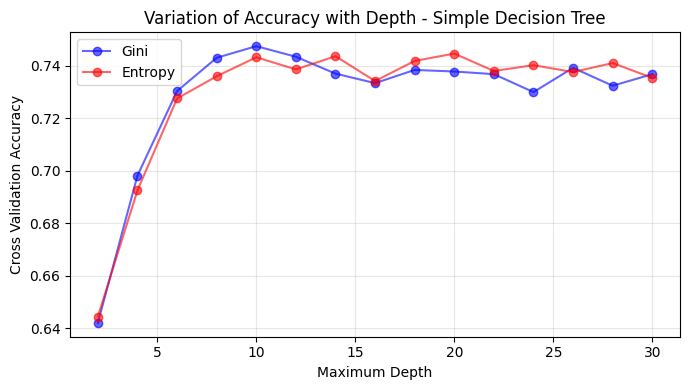

In [33]:
# View plot (also from lab) to determine optimization params
plt.figure(figsize=(7, 4))

plt.plot(df_depth[df_depth.criterion == 'gini'].depth,
         df_depth[df_depth.criterion == 'gini'].mean_cv, 'b-', marker='o', alpha = 0.6, label='Gini')
plt.plot(df_depth[df_depth.criterion == 'entropy'].depth,
         df_depth[df_depth.criterion == 'entropy'].mean_cv, 'r-', marker='o', alpha = 0.6, label='Entropy')
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
plt.legend()
plt.grid(alpha = 0.3)

plt.tight_layout()
plt.show()

In [34]:
# do same process with min_samples_leaf
df_leaf = pd.DataFrame(columns=['criterion', 'min_samples_leaf', 'all_cv', 'mean_cv'])

criterion = ['gini', 'entropy']

first_min_samples = 10
final_min_samples = 50
step = 2

results = []
for cur_criterion in criterion:      
    for min_samples_leaf in range(first_min_samples, final_min_samples+1, step):
        dt = DecisionTreeClassifier(criterion=cur_criterion , min_samples_leaf=min_samples_leaf)
        scores = cross_val_score(estimator=dt, X=X_train_dt, y=y_train_dt, cv=5, n_jobs=-1)
        
        cur_results = {'criterion': cur_criterion,
                      'min_samples_leaf': min_samples_leaf,
                      'all_cv': scores,
                      'mean_cv': scores.mean()}
        results.append(cur_results)
df_leaf = pd.DataFrame(results)

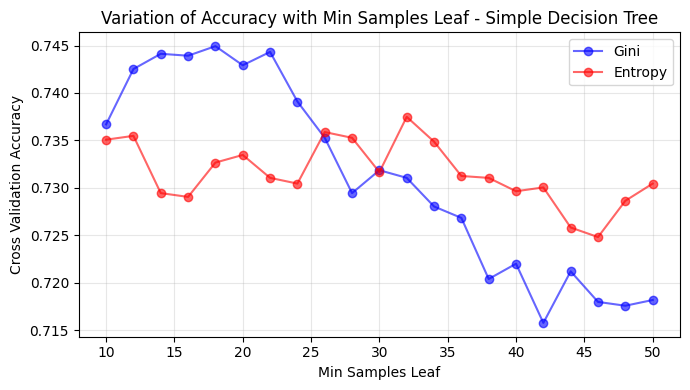

In [35]:
plt.figure(figsize=(7, 4))

plt.plot(df_leaf[df_leaf.criterion == 'gini'].min_samples_leaf,
         df_leaf[df_leaf.criterion == 'gini'].mean_cv, 'b-', marker='o', alpha = 0.6, label='Gini')
plt.plot(df_leaf[df_leaf.criterion == 'entropy'].min_samples_leaf,
         df_leaf[df_leaf.criterion == 'entropy'].mean_cv, 'r-', marker='o', alpha = 0.6, label='Entropy')
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Min Samples Leaf")
plt.title('Variation of Accuracy with Min Samples Leaf - Simple Decision Tree')
plt.legend()
plt.grid(alpha = 0.3)

plt.tight_layout()
plt.show()

In [36]:
# since depth deemed a more viable stopping condition 
# find depth where avg of both entropy and gini is highest
optimal_depth = 18 # based on consistency in above depth plot

simpler_depth = 6 # previous models overfitting on train data
dt = DecisionTreeClassifier(criterion='entropy', max_depth=simpler_depth).fit(X_train_dt, y_train_dt)
y_pred_dt = dt.predict(X_test)
y_pred_dt = label_encoder.inverse_transform(y_pred_dt)
submission_y_pred_dt = pd.DataFrame(y_pred_dt, columns=['DT_Predicted'], index=X_test.index)
submission_y_pred_dt.index.name = 'ID'
submission_y_pred_dt.head()

,DT_Predicted
ID,
0,Graduate
1,Enrolled
2,Graduate
3,Graduate
4,Dropout


In [37]:
dt_report = classification_report(y_train_dt, dt.predict(X_train_dt), target_names=label_encoder.classes_)
print('Decision Tree Report:\n', dt_report)

Decision Tree Report:
               precision    recall  f1-score   support

     Dropout       0.85      0.75      0.80      1657
    Enrolled       0.69      0.72      0.70      1657
    Graduate       0.77      0.84      0.80      1657

    accuracy                           0.77      4971
   macro avg       0.77      0.77      0.77      4971
weighted avg       0.77      0.77      0.77      4971



In [38]:
submission_y_pred_dt.to_csv('./submissions/submission_dt.csv')

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

Observing both Gini impurity and Entropy both have similar accuracy with little fluctuation and a slight increase in model complexity. Maybe another stopping condition will yield more drastic changes. Min Samples Leaf led to a lower accuracy across the tested hyperparameter values. 

Because of this, I chose the value for max_depth that maximized the average accuracy using both quality of split criteria Gini Impurity and Entropy. I avoided using classification error since both Gini and Entropy punish impurity more harshly. 

Additionally, the values of the cross-validation over five folds yielded a high accuracy for complex trees. I created multiple Kaggle submissions for different models, each subsequent submission a simpler model (lower max_depth) that resulted in a lower train score but higher test score. I am curious to see if a Random Forest could alleviate this problem of overfitting on complex trees in the next question.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [39]:
grader.check("dt")

dt results: All test cases passed!

## Model 3: Custom Model

Develop a custom model of your choice using any methods covered in class up through Lecture 20 (so not boosting, neural networks, etc.). You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a custom model of your choice, using any techniques and methods up to and including Lecture 20.
   - Provide a detailed explanation of your modeling choices, including preprocessing, hyperparameter tuning, and rationale for model selection.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_custom.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_custom.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret feature importance where possible for your selected model.
   - Provide visualizations and explanations to support your interpretations.

**Kaggle Competition Link**: [Custom Model Kaggle Competition](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)  
**Kaggle Rules Summary**:
- The model must use only methods covered in class up to and including Lecture 20 (**no boosting, no neural networks, etc.**).
- Submissions will be **disqualified** if lacking sufficient description of the approach taken or if performance cannot be reproduced in your notebook.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).

---

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# bootstrap training samples for random forest

df_depth = pd.DataFrame(columns=['n_estimators','criterion', 'depth', 'all_cv', 'mean_cv'])
n_estimators = [10, 50, 100, 200, 400]
criterion = ['gini', 'entropy']

first_depth = 2
final_depth = 30
step = 2

results = []
for estimators in n_estimators:
    for cur_criterion in criterion:      
        for max_depth in range(first_depth, final_depth+1, step):
            rf = RandomForestClassifier(n_estimators=estimators, criterion=cur_criterion , max_depth=max_depth)
            scores = cross_val_score(estimator=rf, X=X_train_dt, y=y_train_dt, cv=5, n_jobs=-1)
            
            cur_results = {'n_estimators':estimators,
                            'criterion': cur_criterion,
                        'depth': max_depth,
                        'all_cv': scores,
                        'mean_cv': scores.mean()}
            results.append(cur_results)
df_depth = pd.DataFrame(results)


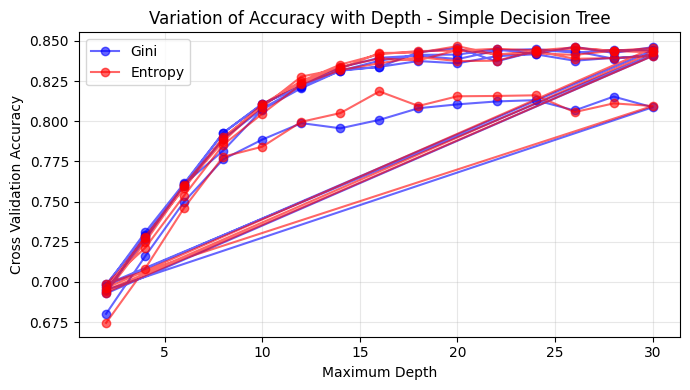

In [42]:
plt.figure(figsize=(7, 4))

plt.plot(df_depth[df_depth.criterion == 'gini'].depth,
         df_depth[df_depth.criterion == 'gini'].mean_cv, 'b-', marker='o', alpha = 0.6, label='Gini')
plt.plot(df_depth[df_depth.criterion == 'entropy'].depth,
         df_depth[df_depth.criterion == 'entropy'].mean_cv, 'r-', marker='o', alpha = 0.6, label='Entropy')
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
plt.legend()
plt.grid(alpha = 0.3)

plt.tight_layout()
plt.show()

In [43]:
# show 5 rows with highest mean_cv where depth is 10 or less
df_depth[df_depth['depth'] <= 4].nlargest(5, 'mean_cv')

,n_estimators,criterion,depth,all_cv,mean_cv
121,400,gini,4,"[0.6974874371859296, 0.6891348088531187, 0.737...",0.730846
61,100,gini,4,"[0.6944723618090453, 0.6871227364185111, 0.728...",0.729237
91,200,gini,4,"[0.6954773869346733, 0.6841046277665996, 0.736...",0.728834
136,400,entropy,4,"[0.6954773869346733, 0.6830985915492958, 0.730...",0.728230
106,200,entropy,4,"[0.6894472361809045, 0.6891348088531187, 0.723...",0.727225


In [44]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=209).fit(X_train_dt, y_train_dt)
y_pred_rf = rf.predict(X_test)

y_pred_rf = label_encoder.inverse_transform(y_pred_rf)

submission_y_pred_rf = pd.DataFrame(y_pred_rf, columns=['Custom_Predicted'], index=X_test.index)
submission_y_pred_rf.index.name = 'ID'
submission_y_pred_rf.head()

,Custom_Predicted
ID,
0,Graduate
1,Enrolled
2,Graduate
3,Graduate
4,Dropout


In [45]:
from sklearn.model_selection import GridSearchCV
len(predictors)

8

In [46]:
# given the above successful RF, lets try to improve it further
# use grid search with above hyperparameters

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [ 'sqrt', 'log2',None,1,2,3,4,5,6,7,8]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train_dt, y_train_dt)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=200,
                                              random_state=209),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', None, 1, 2, 3, 4, 5,
                                          6, 7, 8]},
             scoring='f1_weighted')

In [47]:
# get best params
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,5.941341,0.597223,0.013006,0.004051,entropy,None,"{'criterion': 'entropy', 'max_features': None}",0.718360,0.713955,0.742306,0.793228,0.786702,0.750910,0.033380,1
2,5.339540,0.204698,0.038805,0.015266,gini,None,"{'criterion': 'gini', 'max_features': None}",0.702430,0.718320,0.746969,0.785033,0.787230,0.747996,0.034261,2
10,1.757958,0.219972,0.032451,0.004053,gini,8,"{'criterion': 'gini', 'max_features': 8}",0.708455,0.699361,0.748408,0.784955,0.778341,0.743904,0.035020,3
1,1.125510,0.172987,0.039450,0.012441,gini,log2,"{'criterion': 'gini', 'max_features': 'log2'}",0.697292,0.697964,0.759775,0.786300,0.775486,0.743363,0.038284,4
7,1.387648,0.160165,0.041291,0.015383,gini,5,"{'criterion': 'gini', 'max_features': 5}",0.697292,0.697964,0.759775,0.786300,0.775486,0.743363,0.038284,4


In [48]:
# fit optimized RF
rf = RandomForestClassifier(n_estimators=200, max_depth=5, max_features=6, criterion='gini', random_state=209).fit(X_train_dt, y_train_dt)

y_pred_rf = rf.predict(X_test)

y_pred_rf = label_encoder.inverse_transform(y_pred_rf)

submission_y_pred_rf = pd.DataFrame(y_pred_rf, columns=['Custom_Predicted'], index=X_test.index)
submission_y_pred_rf.index.name = 'ID'
submission_y_pred_rf.head()

,Custom_Predicted
ID,
0,Graduate
1,Enrolled
2,Graduate
3,Graduate
4,Dropout


In [49]:
submission_y_pred_rf.to_csv('./submissions/submission_custom.csv')

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

NOTE: Interestingly, I made a mistake and forgot to use the modified ```X_train``` with dropped predictors in both the models 2 and 3: decision trees and random forests. However, I did not notice this until after submitting to Kaggle and recieving 'good' test scores for both... so I am fascinated to see if this 'happy accident' ends up working out for the Kaggle leaderboard.

Given the issues with overfitting from the decision tree in model 2, the ensemble method of random forest could reduce the variance of the model while introducing randomness when selecting a subset of features for each split in the decision trees. Because Random Forests perform poorly with a large subset of unimportant predictors, I will use the unscaled SMOTE generated training data that I used for the decision tree in model 2.

Observing the five rows with the highest cv accuracy, it seems that the most complex random forests (20 max_depth and above) perform the best. Additionally, the random forests with the most estimators seem to reduce the variance and thus perform best on the validation set, which is consistent with the law of large numbers in ensemble methods. However, the model in part 2 showed that complex models can be overfit on the validation set even with cross-validation. With that considered, I will sacrifice some training accuracy in order to ideally make the model simpler and more generalizable to the test set by only observing the five rows with highest cv accuracy where the max_depth is 10 or less. Interestingly, setting other stopping or splitting conditions like ```min_samples_leaf``` and ```max_features``` yields the same accuracy score in Kaggle as the original stopping condition of just ```max_depth```. 

After multiple submissions, similarly to decision trees, the simpler random forests perform best on the test set. And, I have at last risen to the top of the Kaggle leaderboard with my tuned Random Forest (as of 11/18 at 2:45 PM)... This is a big improvement from being dead last for a little bit for the Logistic Regression submission.

"Anything is possible" - Kevin Garnet 2008

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [50]:
grader.check("custom")

custom results: All test cases passed!

## Model Comparison & Kaggle Submission
- **Compare** all three models based on metrics such as F1 score, accuracy, and interpretability. There are many possible metrics for comparison. Consider those you judge to be particularly relevant for potential use cases of your classifier. 
- **Discuss** the strengths and weaknesses of each approach.
- Submit your **best predictions** for each model to the 3 Kaggle competitions.
    - [OvR Logistic Regression](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)
    - [Decision Tree Classifier](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)
    - [Custom Model](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)

---

In [51]:
# full classification_report
logreg_report = classification_report(y_train_sm, logit_lasso_sm.predict(X_train_sm), target_names=label_encoder.classes_)
dt_report = classification_report(y_train_dt, dt.predict(X_train_dt), target_names=label_encoder.classes_)
rf_report = classification_report(y_train_dt, rf.predict(X_train_dt), target_names=label_encoder.classes_)

print('Logistic Regression Report:\n', logreg_report)
print('Decision Tree Report:\n', dt_report)
print('Random Forest Report:\n', rf_report)

Logistic Regression Report:
               precision    recall  f1-score   support

     Dropout       0.75      0.72      0.73      1657
    Enrolled       0.54      0.60      0.57      1657
    Graduate       0.65      0.60      0.63      1657

    accuracy                           0.64      4971
   macro avg       0.65      0.64      0.64      4971
weighted avg       0.65      0.64      0.64      4971

Decision Tree Report:
               precision    recall  f1-score   support

     Dropout       0.85      0.75      0.80      1657
    Enrolled       0.69      0.72      0.70      1657
    Graduate       0.77      0.84      0.80      1657

    accuracy                           0.77      4971
   macro avg       0.77      0.77      0.77      4971
weighted avg       0.77      0.77      0.77      4971

Random Forest Report:
               precision    recall  f1-score   support

     Dropout       0.85      0.73      0.78      1657
    Enrolled       0.69      0.72      0.70      1657


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

For logistic regression, this model is easiest to interpret and is the most efficient but struggles to draw complex decision boundaries for high-dimensional data. Additionally, this model can quantify feature importance through direct coeficient values and regularization methods and can give us probablistic estimates of X values being in a certain class.

Decision trees are also extremely interpretable as they follow a very human-like decision making process. Unlike logistic regression, it is not necessary to scale the data and is possible to draw complex, non-linear decision boundaries. There was overfitting from the decision tree model *originally* as the larger ```max_depth``` value yielded scores of near 1.00 for virtually every metric. This is a drawback of decision trees but overfitting can be reduced through stopping conditions and/or pruning. This gave motivation to try Random Forest, which is known to reduce overfitting on the test set by minimizing the number of predictors for each tree.

Lastly, Random Forests produced similar f1 scores to the decision tree which is more prone to overfitting on the validation data. Given the imbalanced dataset, Random Forests seemed like a good option after seeing the improvement in performance from logistic regression to decision tree. Random Forests provide ensemble methods to reduce variance and thus the chance of overfitting at the cost of runtime and interpretability to a normal decision tree. As observed in class, the validation score of a Random Forest cannot decrease as the number of estimators increases. It is unsurprising that similar cross-validated metrics from the above classification report above resulted in a much higher test accuracy for the ensemble method than the singular tree.



<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Bonus: Causal Inference
- (Optional) Perform a causal inference analysis on a feature of your choice using one of the trained models.
- Use a technique discussed in class, such as **propensity score matching**.

---

In [55]:
X_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1,1,17,2,9147,1,1,122.0,1,19,19,...,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
2,1,17,3,9670,1,1,123.0,1,38,38,...,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
3,1,39,1,9500,1,19,133.1,1,38,38,...,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
4,2,7,1,9254,1,2,100.0,1,37,37,...,0,0,5,10,0,0.000000,0,10.8,1.4,1.74


In [ ]:
# perform causal inference analysis on Scholarship Holder with all important predictors

# create propensity score logit model (no need for dummies since all continuous or binary)
logit_propensity = LogisticRegressionCV(Cs=np.logspace(-2.2,10),
                             max_iter=10000,
                             fit_intercept=True).fit(X_train[predictors].drop(columns = 'Scholarship holder'), X_train['Scholarship holder'])

coefs = pd.DataFrame({'variable': X_train[predictors].drop(columns = 'Scholarship holder').columns , 'coef': logit_propensity.coef_[0]})

# get probabilities of class 1
propensity_scores = logit_propensity.predict_proba(X_train[predictors].drop(columns = 'Scholarship holder'))[:,1]


Text(0.5, 0, 'coef value')

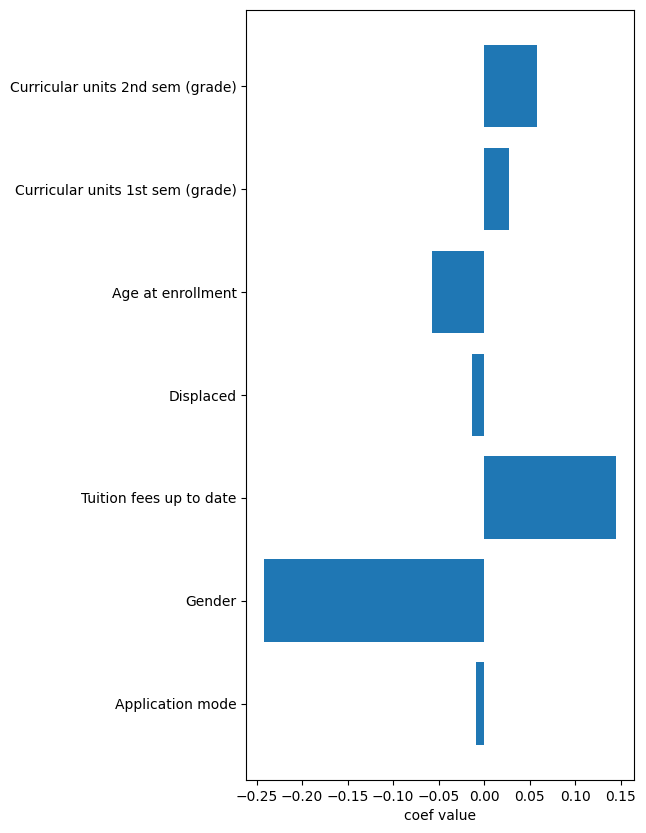

In [64]:
plt.figure(figsize=(5, 10))
plt.barh(y=coefs['variable'],width=coefs['coef'],)
plt.xlabel("coef value")

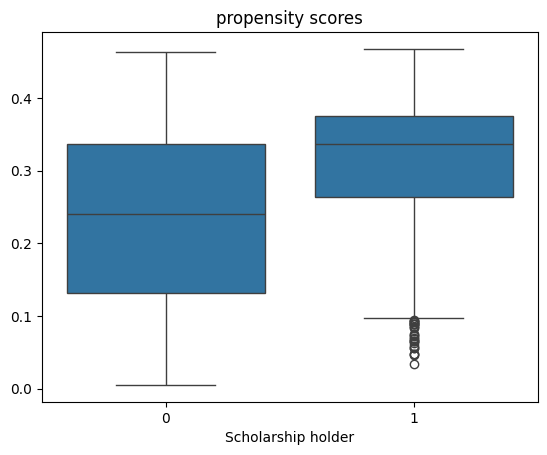

In [66]:
import seaborn as sns

ax = sns.boxplot(y=propensity_scores,x=X_train['Scholarship holder']);
ax.set_title("propensity scores");

In [70]:
# perform propensity score matching
X_train['propensity_scores'] = propensity_scores

max_scholar = np.max(propensity_scores[X_train['Scholarship holder']==0])
min_notscholar = np.min(propensity_scores[X_train['Scholarship holder']==1])

# get rid of propensity scores outside of matching range
which_notscholar = (X_train['propensity_scores']>=min_notscholar) & (X_train['Scholarship holder']==0)
which_scholar = (X_train['propensity_scores']<=max_scholar) & (X_train['Scholarship holder']==1)

X_train_restricted = X_train[which_notscholar | which_scholar]

In [ ]:
# fit logistic regression model on restricted data and baseline data
from sklearn.linear_model import LinearRegression

lm_baseline = LinearRegression().fit(X_train[['Scholarship holder']], X_train['Gender'])
lm_restricted = LinearRegression().fit(X_train_restricted[['Scholarship holder']], X_train_restricted['Gender'])

# get coefficient values
print('Baseline Coefficients:', lm_baseline.coef_)
print('Restricted Coefficients:', lm_restricted.coef_)

Baseline Coefficients: [-0.18072594]
Restricted Coefficients: [-0.17324415]


In [74]:
# create matched dataframe
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

X_train['id'] = X_train.index
psm = PsmPy(X_train, treatment='Scholarship holder', indx='id', exclude = [])

In [76]:
psm.logistic_ps(balance = False)
psm.knn_matched(matcher='propensity_score', replacement=True, 
                caliper=None, drop_unmatched=True)

# To get means from matched data:
scholar_gender = X_train.loc[psm.df_matched[psm.df_matched['Scholarship holder']==1]['id'].values]['Gender']
nonscholar_gender = X_train.loc[psm.df_matched[psm.df_matched['Scholarship holder']==0]['id'].values]['Gender']
print(scholar_gender.mean() - nonscholar_gender.mean())

-0.007185628742514966


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

The propensity score distribution for Scholarship Holder is shown above to be affected most by gender and tuition fees up to date.

The insignificant difference between the means after propensity score matching suggests that the matching process successfully balanced the distribution of gender between scholarship holders and non scholarship holders. However, The difference in propensity scores in the above plots suggest that gender should be addressed as a confounder when using Scholarship holder as a predictor.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Wrap-up and Reflection
- Provide insights on how these models could be used by educational institutions to improve student outcomes.
- Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.
- How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

---

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

These models, specifically models that include shrinkage terms for model selection like LASSO regularization, can be used to determine the most important predictors of enrollment, graduation, and dropping out. As follows, educational institutions should pay more attention and offer resources to students in treatment groups like 'tuition paid on time', for example, in order to boost their enrollment/graduation rate and decrease the dropout rate. 

I found it challenging to keep track of important variables again and which predictors to use for each model... basically staying organized while performing model selection. In addition, I found the propensity score portion interesting but conceptually challenging.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [77]:
hours_spent_on_hw = 15

In [78]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [79]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 60.19 minutes for this notebook to run


🌈 **This concludes HW5. Thank you!**
